In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

[ 0.          1.77242108 10.        ]
[[353.         352.99972871 352.99846941]
 [400.         399.9995162  399.99727044]]
  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.772e+00  1.000e+01]
        y: [[ 3.530e+02  3.530e+02  3.530e+02]
            [ 4.000e+02  4.000e+02  4.000e+02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 14
     njev: 0
      nlu: 0


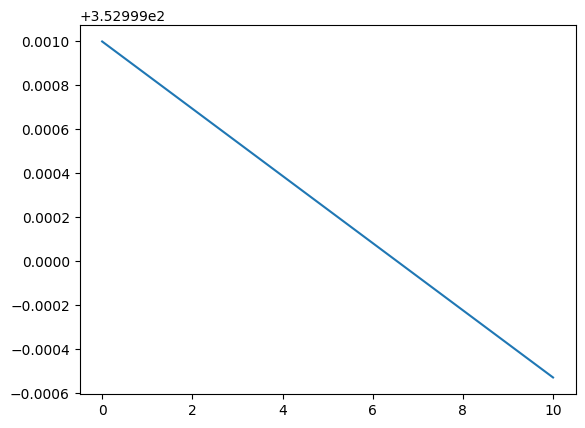

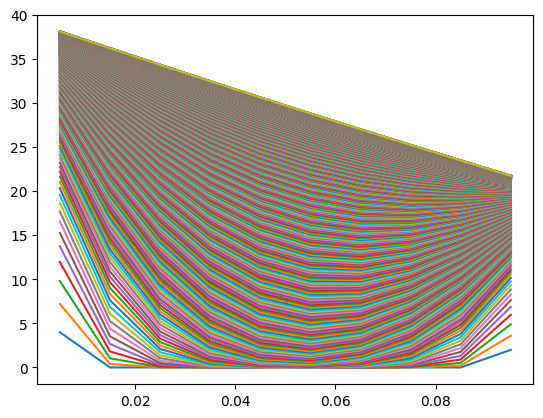

In [7]:

"""
Thermal Solver returns a dT/dt vs t plot for provided initial conditions and boundary conditions

"""

"""
Psuedocode:
    Define Initial Condtions for each node
    define t0 and tf
    function(T, t)
"""
rho = 700
V = 20
c = 700
h = 25
Tinf = 293 
A =1 
def dTdt(t, T0): return -h*A/(rho*V*c)*(T0 - Tinf)
sol = solve_ivp(dTdt, [0,10], [353, 400])
print(sol.t)
print(sol.y)
print(sol)
plt.plot(sol.t, sol.y[0,:])






L = 0.1
n = 10
T0 = 0
T1s = 40 
T2s = 20
dx = L/n
alpha = 1e-4
t_final = 60
dt = 0.1
 
x = np.linspace(dx/2, L-dx/2, n)

T = np.ones(n)*T0
dTdt = np.empty(n)

t = np.arange(0,t_final, dt)

for j in range(1, len(t)):
    for i in range(1, n-1):
        dTdt[i] = alpha*(-(T[i] - T[i-1])/dx**2 + (T[i+1] - T[i])/dx**2)
    dTdt[0] = alpha*(-(T[0] - T1s)/dx**2 + (T[1] - T[0])/dx**2)
    dTdt[n -1] = alpha*(-(T[n-1] - T[n-2])/dx**2 + (T2s - T[n-1])/dx**2)
    T = T + dTdt*dt
    plt.figure(2)
    plt.plot(x,T) 